In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**Import**

Import the requires tools

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Read Dataset**

**1.The first step is to import packages that will be required**

In [5]:
df = pd.read_csv("/content/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**2. Info about data**

In this dataset all data numerical. Dataset hasn't categorical data it's a good but it has Serial No and it musn't be in training. Because learning algorithm its can be memorize all number. So we will take it off.

In [9]:
df_new = df.drop("Serial No.",axis=1)

In [10]:
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


There is no null value in any column

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [12]:
df_new.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Next step is show correlation about Chance of Admit so we will decide which column usefull or unusefull. But this data all of column have a good correlation with Chance of Admit and it hasn't lots of column so we add all of them. if you want you can use backward elimination or other elimination methods.

In [13]:
df_new.corr()["Chance of Admit"]

GRE Score            0.810351
TOEFL Score          0.792228
University Rating    0.690132
SOP                  0.684137
LOR                  0.645365
CGPA                 0.882413
Research             0.545871
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

**3. Visualize of data**

Visualize the target variable with other features

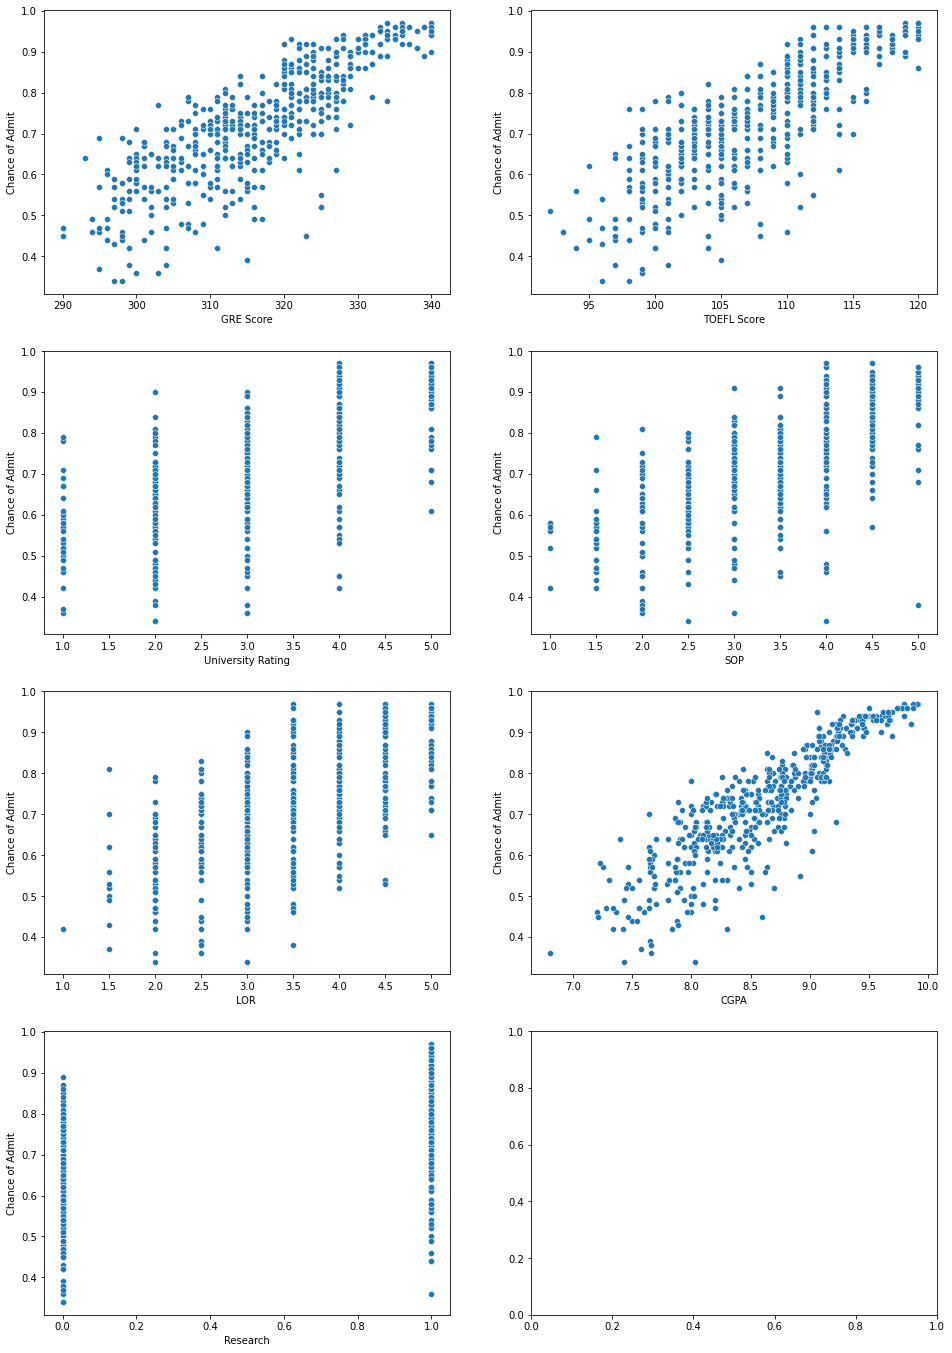

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 24))
ax0 = sbn.scatterplot(x=df_new["GRE Score"],y=df_new["Chance of Admit"], ax=ax[0][0])
ax1 = sbn.scatterplot(x=df_new["TOEFL Score"],y=df_new["Chance of Admit"], ax=ax[0][1])
ax2 = sbn.scatterplot(x=df_new["University Rating"],y=df_new["Chance of Admit"], ax=ax[1][0])
ax3 = sbn.scatterplot(x=df_new["SOP"],y=df_new["Chance of Admit"], ax=ax[1][1])
ax4 = sbn.scatterplot(x=df_new.iloc[:,4],y=df_new["Chance of Admit"], ax=ax[2][0])
ax5 = sbn.scatterplot(x=df_new["CGPA"],y=df_new["Chance of Admit"], ax=ax[2][1])
ax5 = sbn.scatterplot(x=df_new["Research"],y=df_new["Chance of Admit"], ax=ax[3][0])
plt.show()

Distribution of the target variable

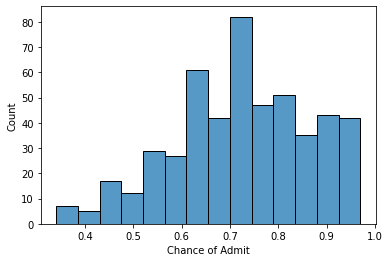

In [15]:
sbn.histplot(df_new["Chance of Admit"]);

**4. Depentedent and Independent Variables**

Chance of Admit we want to predict it. So it's dependent variable(Y), other values is independent variables (X)

In [16]:
X = df_new.drop(["Chance of Admit"],axis=1).values
Y = df_new["Chance of Admit"].values

**5. Train And Test Split**

Next step split the data train and test

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=1)

In [19]:
#Train and Test data shape
print("X_train Shape: ",x_train.shape)
print("X_test Shape: ",x_test.shape)
print("Y_train Shape: ",y_train.shape)
print("Y_test Shape: ",y_test.shape)

X_train Shape:  (400, 7)
X_test Shape:  (100, 7)
Y_train Shape:  (400,)
Y_test Shape:  (100,)


**6. Train And Evaluate Linear Regression**

In [20]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#Predictions
y_pred = lr.predict(x_test)

**7. Model Accuracy**

In [25]:
r2_score(y_test,y_pred)

0.8208741703103739

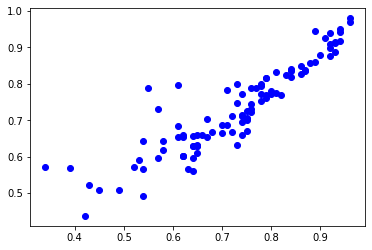

In [26]:
plt.scatter(y_test,y_pred,c="b")